# import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# helper functions (if necessary)

In [2]:
# python code...

# read in training data

In [3]:
data = pd.read_csv("train.csv", delimiter=(','))

# analyze and visualize data

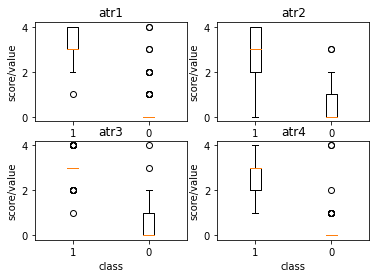

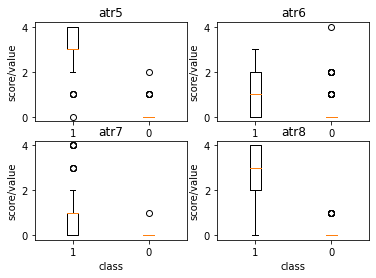

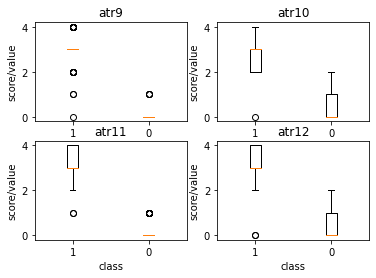

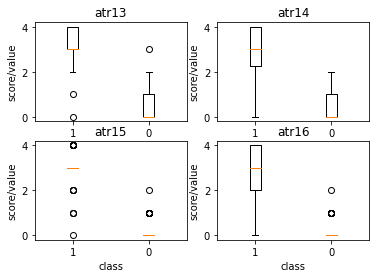

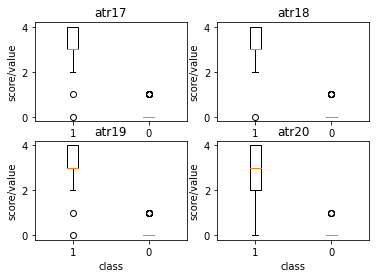

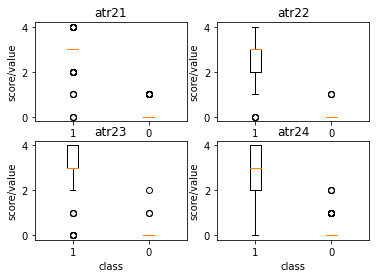

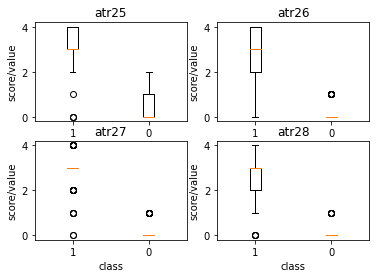

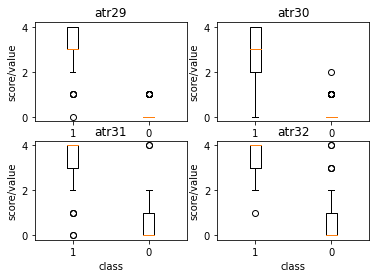

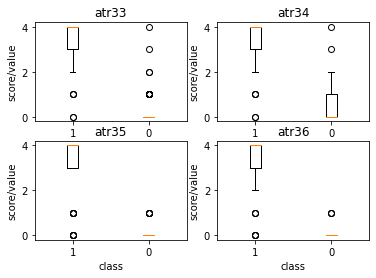

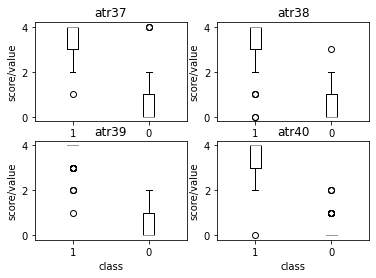

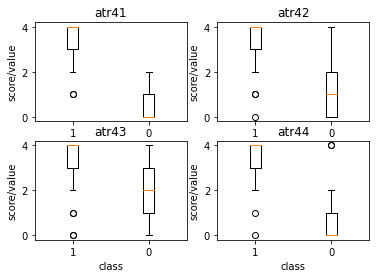

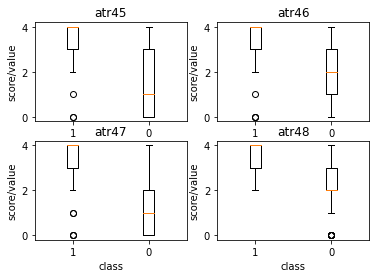

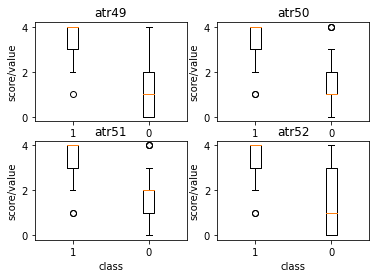

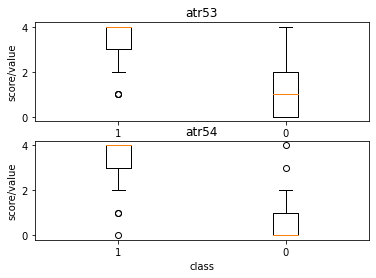

           Atr1      Atr2      Atr3      Atr4      Atr5      Atr6      Atr7  \
Atr1   1.000000  0.824843  0.869292  0.846037  0.870913  0.260541  0.407687   
Atr2   0.824843  1.000000  0.853275  0.821182  0.840805  0.091762  0.396954   
Atr3   0.869292  0.853275  1.000000  0.844343  0.830917  0.270601  0.472632   
Atr4   0.846037  0.821182  0.844343  1.000000  0.827235  0.217974  0.465518   
Atr5   0.870913  0.840805  0.830917  0.827235  1.000000  0.305493  0.365353   
Atr6   0.260541  0.091762  0.270601  0.217974  0.305493  1.000000  0.440340   
Atr7   0.407687  0.396954  0.472632  0.465518  0.365353  0.440340  1.000000   
Atr8   0.800351  0.886802  0.802082  0.816254  0.888299  0.147208  0.388434   
Atr9   0.843446  0.859305  0.842794  0.853259  0.931355  0.267082  0.502712   
Atr10  0.794965  0.792661  0.769313  0.880489  0.835607  0.251287  0.482361   
Atr11  0.891523  0.846263  0.842779  0.830906  0.947806  0.317948  0.422996   
Atr12  0.798900  0.883536  0.801355  0.819105  0.864

In [4]:
class1 = data[data['Class']==1]
class0 = data[data['Class']==0]

for i in range (1,5):
    plt.subplot(2,2,i)
    apol1 = class1['Atr' + str(i)]
    apol0 = class0['Atr' + str(i)]
    plt.boxplot([apol1, apol0], labels= [1,0])
    plt.xlabel("class")
    plt.ylabel("score/value")
    plt.title("atr" + str(i))
plt.show()
   
x = 5
for i in range (0, 12):
    for i in range (1,5):
        plt.subplot(2,2,i)
        apol1 = class1['Atr' + str(x)]
        apol0 = class0['Atr' + str(x)]
        plt.boxplot([apol1, apol0], labels= [1,0])
        plt.xlabel("class")
        plt.ylabel("score/value")
        plt.title("atr" + str(x))
        x+=1
    plt.show()


plt.subplot(2,1,1)
apol1 = class1['Atr53']
apol0 = class0['Atr53']
plt.boxplot([apol1, apol0], labels= [1,0])
plt.xlabel("class")
plt.ylabel("score/value")
plt.title("atr53")
plt.subplot(2,1,2)
apol1 = class1['Atr54']
apol0 = class0['Atr54']
plt.boxplot([apol1, apol0], labels= [1,0])
plt.xlabel("class")
plt.ylabel("score/value")
plt.title("atr54")
plt.show()

y = data['Class']
X = data.drop(['Class'], axis = 1)

correlations = (X.corr())
print(correlations)

HC = correlations > 0.87
print(HC)

# experiment with features and models to predict Divorce class

In [5]:
dtm = DecisionTreeClassifier(random_state=(2))
dtm.fit(X,y)

y_pred = cross_val_predict(dtm, X, y, cv=5)
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred, average='macro')
r = recall_score(y, y_pred, average='macro')

print("all attributes-generic")
print("accuracy: "+ str(a))
print("percision: "+ str(p))
print("recall: "+ str(r))
print("\n")


dtm = DecisionTreeClassifier(splitter='random', random_state=(2))
outcome = dtm.fit(X,y)

y_pred = cross_val_predict(outcome, X, y, cv=5)
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred, average='macro')
r = recall_score(y, y_pred, average='macro')

print("all attributes- split random")
print("accuracy: "+ str(a))
print("percision: "+ str(p))
print("recall: "+ str(r))
print("\n")

X2 = X.drop(['Atr5', 'Atr2', "Atr11", "Atr33", "Atr35"], axis = 1)
dtm2 = DecisionTreeClassifier(random_state=(2))
result= dtm2.fit(X2,y)

y_pred = cross_val_predict(result, X2, y, cv=5)
a2 = accuracy_score(y, y_pred)
p2 = precision_score(y, y_pred, average='macro')
r2 = recall_score(y, y_pred, average='macro')

print("drop 5 2 11 33 35")
print("accuracy: "+ str(a2))
print("percision: "+ str(p2))
print("recall: "+ str(r2))
print("\n")

dtm3 = DecisionTreeClassifier(max_depth=(5), splitter='random', random_state=(2))
result= dtm3.fit(X,y)

y_pred = cross_val_predict(result, X, y, cv=5)
a4 = accuracy_score(y, y_pred)
p4 = precision_score(y, y_pred, average='macro')
r4 = recall_score(y, y_pred, average='macro')

print("all attributes- random depth 5")
print("accuracy: "+ str(a4))
print("percision: "+ str(p4))
print("recall: "+ str(r4))
print("\n")

dataHalf = X.iloc[:,:27]

dtm3 = DecisionTreeClassifier(max_depth=(5), splitter='random', random_state=(2))
result= dtm3.fit(dataHalf,y)

y_pred = cross_val_predict(result, dataHalf, y, cv=5)
a4 = accuracy_score(y, y_pred)
p4 = precision_score(y, y_pred, average='macro')
r4 = recall_score(y, y_pred, average='macro')

print("first half attributes- random -depth 5")
print("accuracy: "+ str(a4))
print("percision: "+ str(p4))
print("recall: "+ str(r4))
print("\n")


dataHalf2 = X.iloc[:,27:]

dtm3 = DecisionTreeClassifier(max_depth=(5), splitter='random' , random_state=(2))
result= dtm3.fit(dataHalf2,y)

y_pred = cross_val_predict(result, dataHalf2, y, cv=5)
a4 = accuracy_score(y, y_pred)
p4 = precision_score(y, y_pred, average='macro')
r4 = recall_score(y, y_pred, average='macro')

print("2nd half attributes- random -depth 5")
print("accuracy: "+ str(a4))
print("percision: "+ str(p4))
print("recall: "+ str(r4))
print("\n")

all attributes-generic
accuracy: 0.9926470588235294
percision: 0.9929577464788732
recall: 0.9924242424242424


all attributes- split random
accuracy: 0.9779411764705882
percision: 0.9782231852654388
recall: 0.9777056277056277


drop 5 2 11 33 35
accuracy: 0.9852941176470589
percision: 0.9861111111111112
recall: 0.9848484848484849


all attributes- random depth 5
accuracy: 0.9779411764705882
percision: 0.9782231852654388
recall: 0.9777056277056277


first half attributes- random -depth 5
accuracy: 0.9705882352941176
percision: 0.9705627705627706
recall: 0.9705627705627706


2nd half attributes- random -depth 5
accuracy: 0.9558823529411765
percision: 0.9565972222222222
recall: 0.9554112554112555




# Question: What features and model parameters worked "best"?  Why?

The features I found that worked best were the 2nd half of the attributes. In this case the model parameters that made this the best outcome were the splitter being set at random, the max depth at 5 and random state(2). The random state was used to seed my experiments and keep them consistant over the runs.
This was the best feature and parameter combination becuase it keeps the accuracy perceion and recall high in the 95 percent area but it doesn't go too high to where I am worried that it will be overfit. this data set worked really well in a decision tree and was giveing out high accuracy percision and recalll on most models, and I wanted one that was still very high in these values while retaining some wiggle room for new data to avoid overitting.

# build "fresh" classification model based on experimentation

In [6]:
Xhalf2 = X.iloc[:,27:]
finalTree = DecisionTreeClassifier(max_depth=(5), splitter='random' , random_state=(2))
finalresult = finalTree.fit(Xhalf2,y)

# read in test data

In [7]:
testData = pd.read_csv("test.csv", delimiter=",")

# predict Divorce class of test data

In [8]:
alteredTest = testData.iloc[:,27:]
testLabels = finalresult.predict(alteredTest)

testData['Class'] = testLabels

# write test data with predictions to \<YourLastName.csv>

In [9]:
testData.to_csv('Cumro.csv', index=False, sep=',')